## EVC Energy consumption analysis

In [120]:
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#avoid warnings
import warnings
warnings.filterwarnings("ignore")
#plt style
#plt.style.use('fivethirtyeight')
import datetime
import calendar
plt.style.use("seaborn-whitegrid")
plt.style.use('fivethirtyeight')

In [121]:
import datetime
def dow(date):
    days=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    return days[date]

def conver(x):
    return dow(x.weekday())

def month_conversion(x):
    import calendar
    return calendar.month_abbr[x]

In [122]:
consumption_data=pd.read_excel("C:/Users/admin/Desktop/rohan/projects/EV/data_set/EVCS_consu/ev_chargingstationdata.xlsx")

### some brief of the data set like what each row represents?
We have data from 2018-01-01 to 2019-08-29. Each row represents, Date EV charging station ports were used, Number of times the charging ports were used on the listed date, The sum of all times charging ports was used from the beginning of 2018 up to the most recent listed date, Number of the unique drivers using the charging station on this particular date, The total number of city-owned EV charging ports for the particular listed date. Many city stations have two ports that let drivers charge two cars at once, so this data set monitors the availability of total ports, The amount of energy that has been dispensed by the charging stations on the particular listed date. Energy is measured in kilowatt-hours (kWh), Estimated emissions avoided based on the energy dispensed and gasoline saved by the charging stations on the listed date. These figures are collected in kilograms (kg) of carbon dioxide equivalent, Estimated emissions avoided based on the energy dispensed and gasoline saved by the charging stations on the listed date. These figures are collected in kilograms (kg) of carbon dioxide equivalent, The number of minutes any vehicle was plugged in and actively charging on the particular listed date. This does not capture time a vehicle was plugged in and no longer charging. Estimated gallons of gasoline saved based on charging time on the particular listed date.

### Add new variable

speed_of_energy_transmittion(KWh per minute) = (Energy_dispersed in the session()) / (Total_time_taken_to_disperse_the) energy

In [123]:
consumption_data['Speed_energy_transmittion']=consumption_data['Energy (kWh)']/consumption_data['Charge time (minutes)']

### First look of the data set

In [147]:
consumption_data.head(10)

,Date,No Of Sessions,Accumulated Sessions,Unique Drivers,No. of Ports,Energy (kWh),Accumulated Energy (MWh),GHG savings (kg),Accumulated GHG (kg),Charge time (minutes),Gasoline Savings (gallons),Speed_energy_transmittion,Month,Year,day,week_days,Energy (MWh)
0,2018-01-01,1,1,1,16,7,0.01,3,3,123,0.82,0.056911,Jan,2018,1,Monday,0.007
1,2018-01-02,2,3,1,16,18,0.02,7,10,24,0.31,0.750000,Jan,2018,2,Tuesday,0.018
2,2018-01-03,3,6,3,18,11,0.04,5,15,376,3.30,0.029255,Jan,2018,3,Wednesday,0.011
3,2018-01-04,6,12,6,20,50,0.09,21,36,406,3.59,0.123153,Jan,2018,4,Thursday,0.050
4,2018-01-05,2,14,2,20,3,0.09,1,37,62,0.37,0.048387,Jan,2018,5,Friday,0.003
5,2018-01-06,6,20,6,20,33,0.12,14,51,528,4.11,0.062500,Jan,2018,6,Saturday,0.033
6,2018-01-07,4,24,4,20,31,0.15,13,64,435,3.84,0.071264,Jan,2018,7,Sunday,0.031
7,2018-01-08,2,26,2,20,24,0.18,10,74,353,3.14,0.067989,Jan,2018,8,Monday,0.024
8,2018-01-09,7,33,6,20,46,0.22,19,93,750,6.12,0.061333,Jan,2018,9,Tuesday,0.046
9,2018-01-10,8,41,8,20,47,0.27,20,113,580,5.87,0.081034,Jan,2018,10,Wednesday,0.047


In [158]:
consumption_data[['Date','No Of Sessions','Unique Drivers']].to_csv("no_users_sessions.csv")

### Descriptive analysis

##### Users and sessions

Text(0.5, 1.0, 'Number of Users by Months and year')

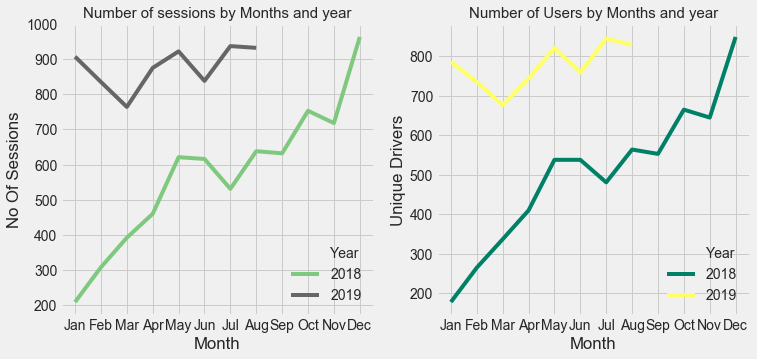

In [149]:
consumption_data['Month']=consumption_data['Date'].dt.month.apply(month_conversion)
consumption_data['Year']=consumption_data['Date'].dt.year
consumption_data['day']=consumption_data['Date'].dt.day
consumption_data['week_days']=consumption_data['Date'].apply(conver)

consumption_data['Month'].unique()

consumption_data['week_days']=pd.Categorical(consumption_data['week_days'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
    ordered=True)
consumption_data['Month']=pd.Categorical(consumption_data['Month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],
    ordered=True)

consumption_data['Year']=consumption_data['Year'].astype('str')
#plt.style.use("dark_background")
fig = plt.figure(figsize = (11,5))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#consumption_data.groupby(['Year','Month'])['No Of Sessions'].sum().plot(kind = 'line',linestyle='dashed',color="green")
#plt.title("Number of session per year",weight="bold")
#plt.xlabel("Year")
#plt.ylabel("Number of sessions")

#plt.style.use('fivethirtyeight')
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['No Of Sessions'].sum().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['No Of Sessions'].sum().reset_index()['No Of Sessions'],hue = consumption_data.groupby(['Year','Month'])['No Of Sessions'].sum().reset_index()['Year'].astype(int),palette="Accent")
plt.title("Number of sessions by Months and year",fontsize=15)

ax = fig.add_subplot(122)
#consumption_data.groupby(['Year','Month'])['Unique Drivers'].sum().plot(kind = 'line',linestyle='dashed',color="red")
#plt.title("Number of unique users per year",weight="bold")
#plt.xlabel("Year")
#plt.ylabel("Number of users")
#plt.title('Voltage',weight = 'bold')
#consumption_data.groupby(['Year'])['No Of Sessions'].sum().plot(kind = 'pie',autopct='%1.1f%%',figsize=(12,12))#plt.ylabel('')
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['Unique Drivers'].sum().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['Unique Drivers'].sum().reset_index()['Unique Drivers'],hue = consumption_data.groupby(['Year','Month'])['Unique Drivers'].sum().reset_index()['Year'].astype(int),palette="summer")
plt.title("Number of Users by Months and year",fontsize=15)

#ax = fig.add_subplot(122)
#consumption_data.groupby(['Year'])['No Of Sessions'].sum().plot(kind = 'line',figsize=(8,6),color="green")
#plt.title("Analysis by year",weight="bold")
#plt.xlabel("")
#plt.ylabel("Number of sessions")

#ax = fig.add_subplot(223)
#consumption_data.groupby(['Year'])['Unique Drivers'].sum().plot(kind = 'pie',figsize=(8,6),autopct='%1.1f%%')

#ax = fig.add_subplot(224)
#consumption_data.groupby(['Year'])['Unique Drivers'].sum().plot(kind = 'line',figsize=(8,6),color="red")
#plt.title("Number of unique users per year")
#plt.ylabel("Number of users")

In [126]:
print("\nYearly average of number of users")
print(consumption_data.groupby(['Year'])['Unique Drivers'].mean())
print("The increase in percentage from 2018 to 2019 :-",((25.70-16.50)/16.50)*100)

print("\nYearly average of number of session done by the users")
print(consumption_data.groupby(['Year'])['No Of Sessions'].mean())
print("The increase in percentage from 2018 to 2019 :-",((29.08-18.74)/18.74)*100)


Yearly average of number of users
Year
2018    16.501370
2019    25.705394
Name: Unique Drivers, dtype: float64
The increase in percentage from 2018 to 2019 :- 55.75757575757575

Yearly average of number of session done by the users
Year
2018    18.742466
2019    29.087137
Name: No Of Sessions, dtype: float64
The increase in percentage from 2018 to 2019 :- 55.17609391675561


##### Inference
- There is 55.75% increase in the average Number of users using EVSE per year 's form 2018 to 2019.
- Due the increase in the average user ,the average number of session has also got increased by 55.17%
- so the trend of Average number of users and sessions done by users has a positive trend from 2018 to 2019

Text(0, 0.5, 'Number of Users')

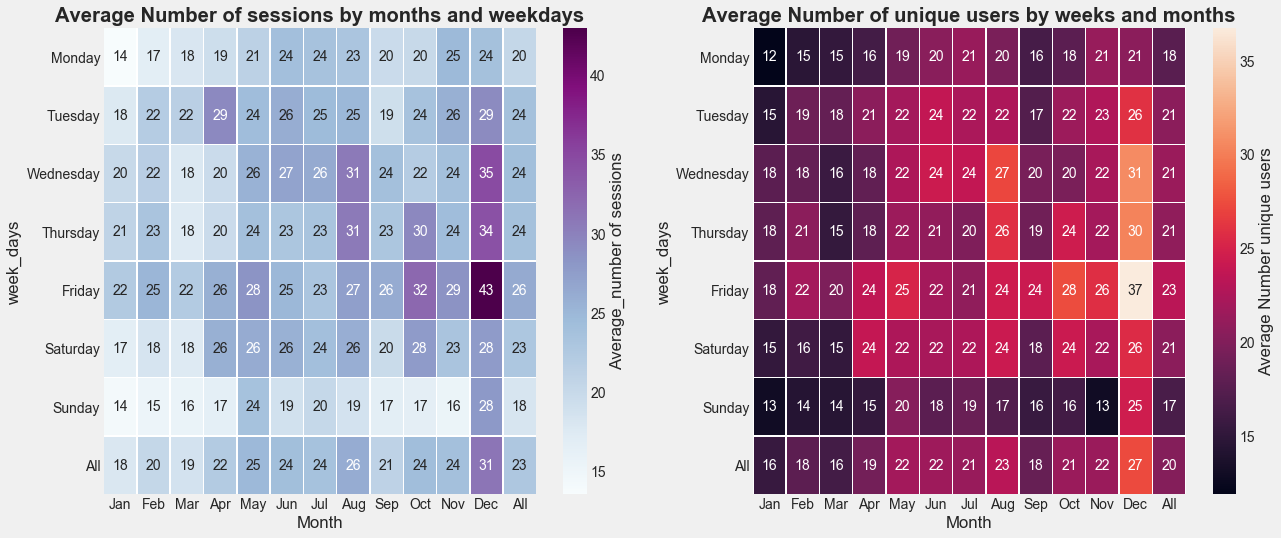

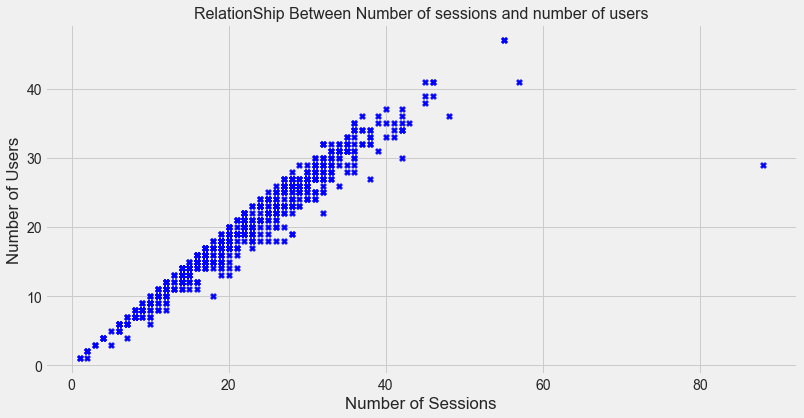

In [127]:
fig = plt.figure(figsize = (19,8))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#f, ax = plt.subplots(figsize=(7,7))
ax.set_title('{} Number of sessions by months and weekdays'.format('Average'),weight="bold")
sns.heatmap(consumption_data.pivot_table('No Of Sessions', index='week_days',
                columns=['Month'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu", linewidths=.5, ax=ax,cbar_kws={'label': 'Average_number of sessions'})
ax = fig.add_subplot(122)
#f, ax = plt.subplots(figsize=(7,7))
ax.set_title('{} Number of unique users by weeks and months'.format('Average'),weight="bold")
sns.heatmap(consumption_data.pivot_table('Unique Drivers', index='week_days',
                columns=['Month'],aggfunc='mean',margins=True),
                annot=True, linewidths=.5, ax=ax,cbar_kws={'label': 'Average Number unique users'})

plt.figure(figsize=(12,6))
plt.scatter(consumption_data['No Of Sessions'],consumption_data['Unique Drivers'],marker="X",color='blue')
plt.title("RelationShip Between Number of sessions and number of users",fontsize=16)
plt.xlabel("Number of Sessions")
plt.ylabel("Number of Users")

##### Inference
- The average of users count is high from Tuesday to Saturday.This means generally the most of the users are using EV 's for local transportation ,users may be using EV 's for travelling for work places and connecting EVSE to EV near to their work places.
- The average of users count is high from Oct-Dec as compare to other months.
- Due to average number of users are more from Tuesday to Saturday and month from Oct-Dec ,the count of average number of sessions are also more in these days and months

##### Energy consumption

In [128]:
consumption_data.groupby(["Month","week_days"])['Energy (kWh)'].mean().reset_index().to_csv("heat_map_data_average_data.csv")

Text(0, 0.5, 'Energy consumption(MwH)')

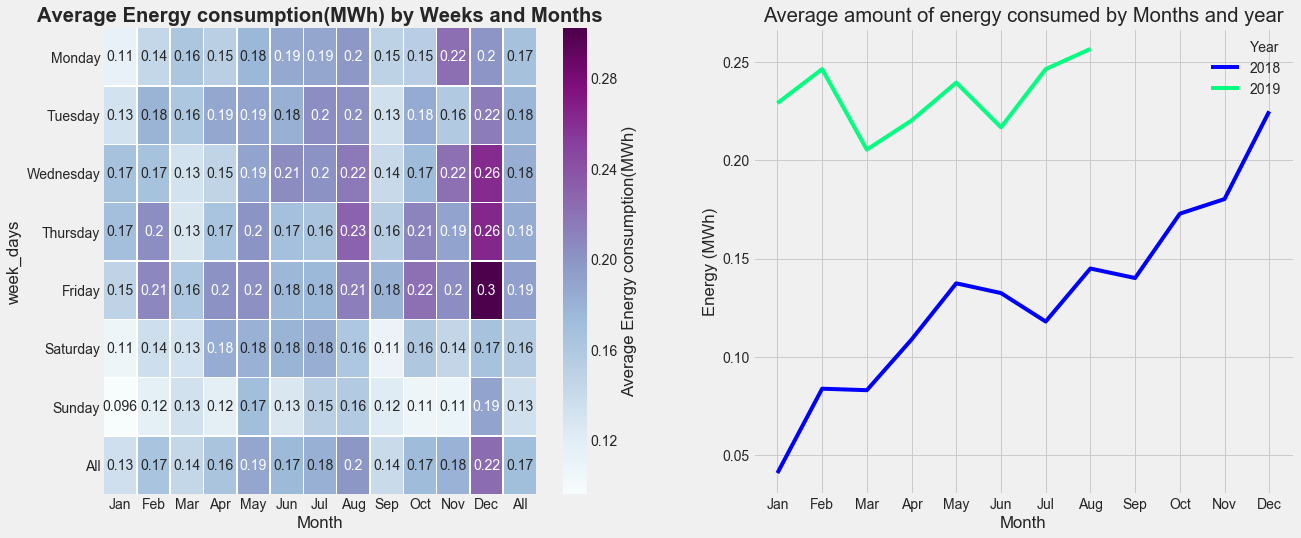

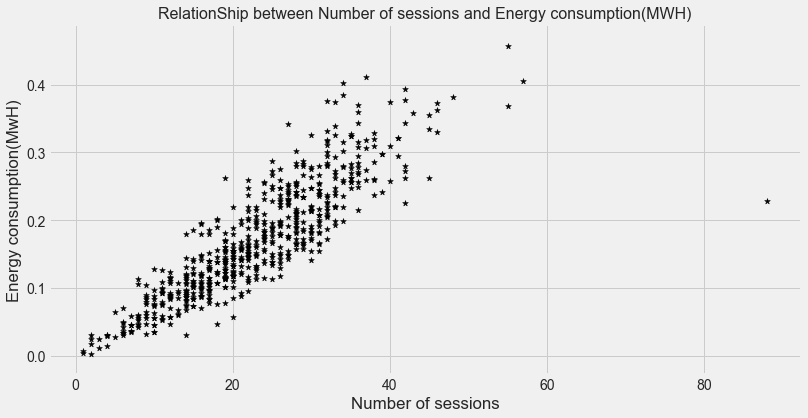

In [129]:
consumption_data['Energy (MWh)']=consumption_data['Energy (kWh)']*0.0010000

fig = plt.figure(figsize = (19,8))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#f, ax = plt.subplots(figsize=(7,7))
ax.set_title('{} Energy consumption(MWh) by Weeks and Months'.format('Average'),weight="bold")
sns.heatmap(consumption_data.pivot_table('Energy (MWh)', index='week_days',
                columns=['Month'],aggfunc='mean',margins=True),
                annot=True,cmap="BuPu",linewidths=.5, ax=ax,cbar_kws={'label': 'Average Energy consumption(MWh)'})

ax=fig.add_subplot(122)
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['Energy (MWh)'].mean().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['Energy (MWh)'].mean().reset_index()['Energy (MWh)'],hue = consumption_data.groupby(['Year','Month'])['Energy (MWh)'].mean().reset_index()['Year'].astype(int),palette="winter")
plt.title("Average amount of energy consumed by Months and year")

#ax=fig.add_subplot(223)
plt.figure(figsize=(12,6))
plt.scatter(consumption_data['No Of Sessions'],consumption_data['Energy (MWh)'],marker="*",color='black')
plt.title("RelationShip between Number of sessions and Energy consumption(MWH)",fontsize=16)
plt.xlabel("Number of sessions")
plt.ylabel("Energy consumption(MwH)")

In [130]:
print("\nYearly average energy consumption(MWH)")
print(consumption_data.groupby(['Year'])['Energy (MWh)'].mean())
print("Difference of average in two years:-", ((0.232141- 0.130910)/0.130910)*100)


Yearly average energy consumption(MWH)
Year
2018    0.130910
2019    0.232141
Name: Energy (MWh), dtype: float64
Difference of average in two years:- 77.3286991062562


##### Inference 

- AS the Average demand for number of sessions is high from Mon-Fri and in months Oct-Dec ,the energy consumption is also high in these days of the week and months
- There is 77% increase in average of energy consumption(MWH) from 2018 to 2019,so there is positive trend for average energy consumption per year

Text(0.5, 1.0, 'Average time by Months and year')

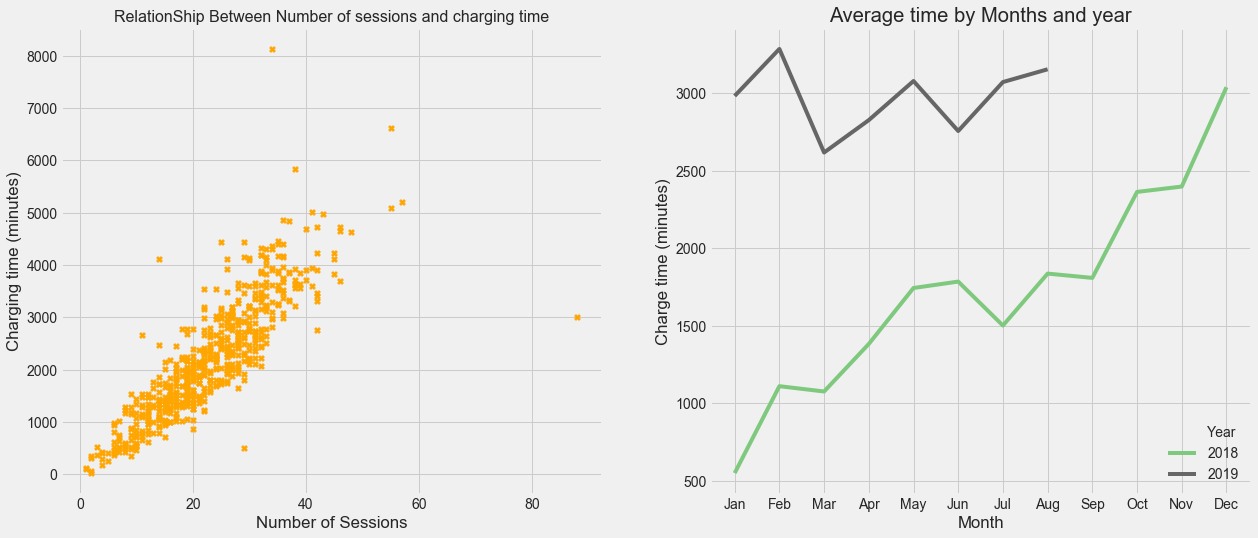

In [131]:
fig = plt.figure(figsize = (19,8))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#plt.figure(figsize=(12,6))
plt.scatter(consumption_data['No Of Sessions'],consumption_data['Charge time (minutes)'],marker="X",color='orange')
plt.title("RelationShip Between Number of sessions and charging time",fontsize=16)
plt.xlabel("Number of Sessions")
plt.ylabel("Charging time (minutes)")

ax=fig.add_subplot(122)
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['Charge time (minutes)'].mean().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['Charge time (minutes)'].mean().reset_index()['Charge time (minutes)'],hue = consumption_data.groupby(['Year','Month'])['Charge time (minutes)'].mean().reset_index()['Year'].astype(int),palette="Accent")
plt.title("Average time by Months and year")

In [132]:
print("\nYearly average charging time")
print(consumption_data.groupby(['Year'])['Charge time (minutes)'].mean())
print("Difference of average in two years:-", ((2966.576763 - 1718.961644)/1718.961644)*100)


Yearly average charging time
Year
2018    1718.961644
2019    2966.576763
Name: Charge time (minutes), dtype: float64
Difference of average in two years:- 72.57957868663183


##### Inference
- As Charging time in a day has linear relationship between Number of session happens in a day,so average charging time will be high from Mon-Fri and in months Oct-Dec ,because the number of sessions are high in these months and days
- There is 72% increase in average charging time from 2018 to 2019.

##### Amount of GHG(kg) and Gasoline Savings (gallons) by using electrical power in EV

 Note :- In data dictionary it has been mentioned that Estimated gallons of gasoline saved based on charging time on the particular listed date. 

Text(0.5, 1.0, 'Average amount of Gasoline Savings (gallons) by Months and year')

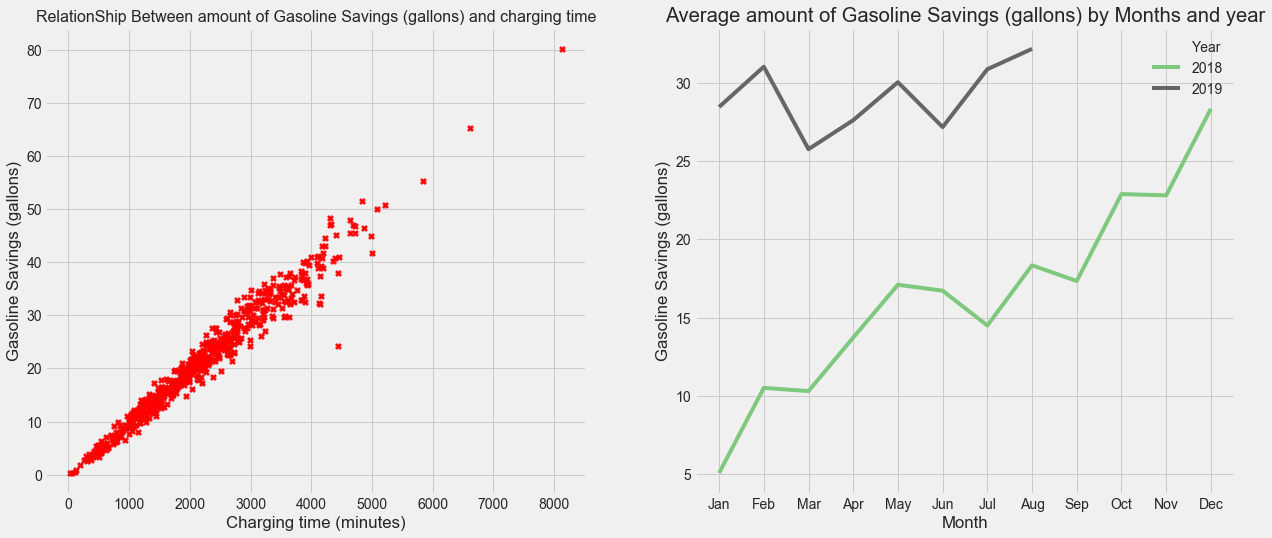

In [133]:
fig = plt.figure(figsize = (19,8))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#plt.figure(figsize=(12,6))
plt.scatter(consumption_data['Charge time (minutes)'],consumption_data['Gasoline Savings (gallons)'],marker="X",color='red')
plt.title("RelationShip Between amount of Gasoline Savings (gallons) and charging time",fontsize=16)
plt.xlabel("Charging time (minutes)")
plt.ylabel("Gasoline Savings (gallons)")

ax=fig.add_subplot(122)
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['Gasoline Savings (gallons)'].mean().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['Gasoline Savings (gallons)'].mean().reset_index()['Gasoline Savings (gallons)'],hue = consumption_data.groupby(['Year','Month'])['Gasoline Savings (gallons)'].mean().reset_index()['Year'].astype(int),palette="Accent")
plt.title("Average amount of Gasoline Savings (gallons) by Months and year")

In [134]:
print("\nYearly average Gasoline")
print(consumption_data.groupby(['Year'])['Gasoline Savings (gallons)'].mean())
print("average percentage increase in two years:-", ((29.120627 - 16.502904)/16.502904)*100)


Yearly average Gasoline
Year
2018    16.502904
2019    29.120627
Name: Gasoline Savings (gallons), dtype: float64
average percentage increase in two years:- 76.45759194866551


##### Inference
- As Amount of Gasoline Savings (gallons) saved in a day  has linear relationship between Charging time in a day ,so average gasoline saving(gallons) will be high from Mon-Fri and in months Oct-Dec ,because the Charging time are high in these months and days
- There is 76% increase in average Gasoline saved in the year from 2018 to 2019.

Text(0.5, 1.0, 'Average amount of GHG savings (kg) by Months and year')

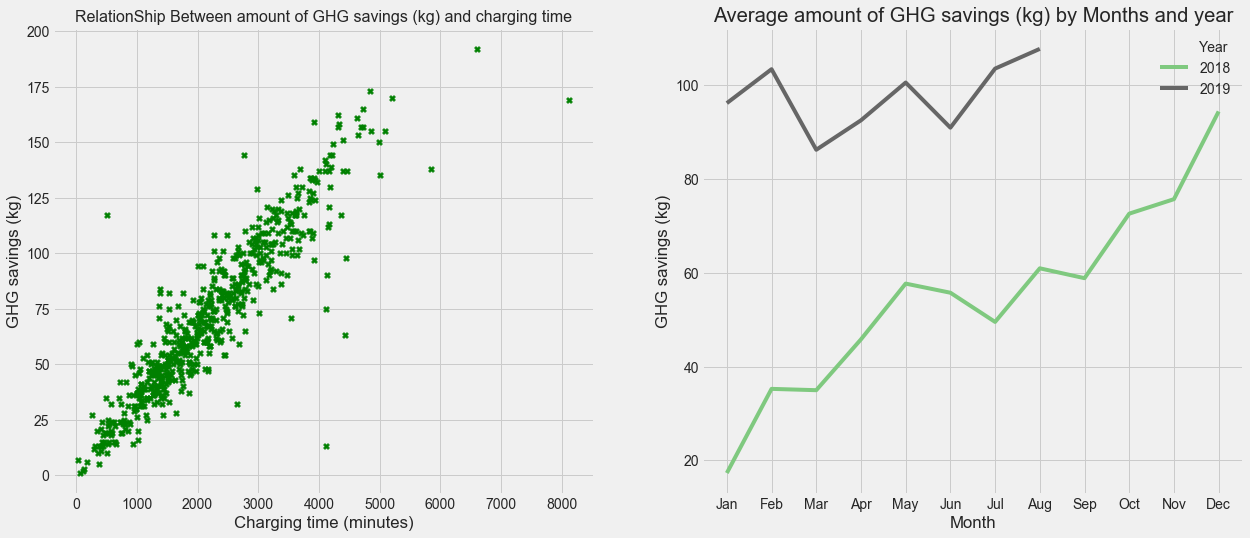

In [135]:
fig = plt.figure(figsize = (19,8))

#plt.title("Analysis per year",weight='bold')
ax = fig.add_subplot(121)
#plt.figure(figsize=(12,6))
plt.scatter(consumption_data['Charge time (minutes)'],consumption_data['GHG savings (kg)'],marker="X",color='green')
plt.title("RelationShip Between amount of GHG savings (kg) and charging time",fontsize=16)
plt.xlabel("Charging time (minutes)")
plt.ylabel("GHG savings (kg)")

ax=fig.add_subplot(122)
sns.lineplot(x= consumption_data.groupby(['Year','Month'])['GHG savings (kg)'].mean().reset_index().Month,y=consumption_data.groupby(['Year','Month'])['GHG savings (kg)'].mean().reset_index()['GHG savings (kg)'],hue = consumption_data.groupby(['Year','Month'])['GHG savings (kg)'].mean().reset_index()['Year'].astype(int),palette="Accent")
plt.title("Average amount of GHG savings (kg) by Months and year")

In [136]:
print("\nYearly average GHG ")
print(consumption_data.groupby(['Year'])['GHG savings (kg)'].mean())
print("average percentage increase in two years:-", ((97.485477 - 55.002740)/55.002740)*100)


Yearly average GHG 
Year
2018    55.002740
2019    97.485477
Name: GHG savings (kg), dtype: float64
average percentage increase in two years:- 77.23749216857196


##### Inference
- As Amount of GHG savings (kg) saved in a day  has linear relationship between Charging time in a day ,so average GHG savings (kg)  will be high from Mon-Fri and in months Oct-Dec ,because the Charging time are high in these months and days
- There is 77% increase in average Gasoline saved in the year from 2018 to 2019.

##### Conclusion

The Demand for power is more on week days as compare to weekend ,so due to the demand, the consumption of energy ,charging time,volume of GHG saved and volume of gasoline saved is also high in these days.For coming years the demand for energy will be high.

In [19]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [48]:
consumption_data.groupby(['Month','Year'])['Energy (kWh)','Gasoline Savings (gallons)'].mean().reset_index().to_csv("energy_gasoline_new.csv")

In [52]:
consumption_data.groupby(['Month','Year'])['Gasoline Savings (gallons)','GHG savings (kg)'].mean().reset_index().to_csv("gasoline_gas_new.csv")

In [27]:
consumption_data

,Date,No Of Sessions,Accumulated Sessions,Unique Drivers,No. of Ports,Energy (kWh),Accumulated Energy (MWh),GHG savings (kg),Accumulated GHG (kg),Charge time (minutes),Gasoline Savings (gallons),Speed_energy_transmittion,Month,Year,day,week_days,Energy (MWh)
0,2018-01-01,1,1,1,16,7,0.01,3,3,123,0.820,0.056911,Jan,2018,1,Monday,0.007
1,2018-01-02,2,3,1,16,18,0.02,7,10,24,0.310,0.750000,Jan,2018,2,Tuesday,0.018
2,2018-01-03,3,6,3,18,11,0.04,5,15,376,3.300,0.029255,Jan,2018,3,Wednesday,0.011
3,2018-01-04,6,12,6,20,50,0.09,21,36,406,3.590,0.123153,Jan,2018,4,Thursday,0.050
4,2018-01-05,2,14,2,20,3,0.09,1,37,62,0.370,0.048387,Jan,2018,5,Friday,0.003
5,2018-01-06,6,20,6,20,33,0.12,14,51,528,4.110,0.062500,Jan,2018,6,Saturday,0.033
6,2018-01-07,4,24,4,20,31,0.15,13,64,435,3.840,0.071264,Jan,2018,7,Sunday,0.031
7,2018-01-08,2,26,2,20,24,0.18,10,74,353,3.140,0.067989,Jan,2018,8,Monday,0.024
8,2018-01-09,7,33,6,20,46,0.22,19,93,750,6.120,0.061333,Jan,2018,9,Tuesday,0.046
9,2018-01-10,8,41,8,20,47,0.27,20,113,580,5.870,0.081034,Jan,2018,10,Wednesday,0.047


In [42]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
import datetime
from datetime import timedelta
import pytz
import calendar
import functools 
%matplotlib inline
plt.style.use("seaborn-whitegrid")
from matplotlib import pyplot as plt
from matplotlib import style
import time
from os import system, name
from IPython.display import clear_output
%matplotlib inline

IndexError: tuple index out of range

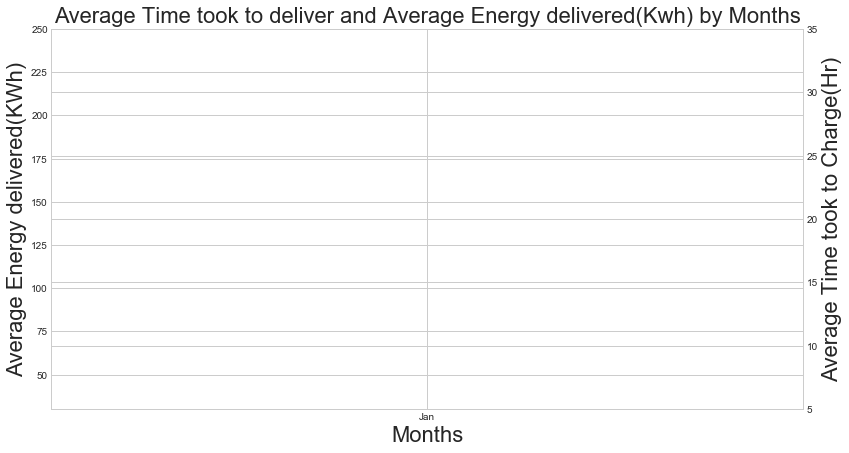

In [72]:
fig = plt.figure(figsize = (12,7))
host = fig.add_subplot(111)

par1 = host.twinx()

host.set_ylim(30,250)
par1.set_ylim(5,35)

host.set_xlabel("Months",fontsize=22)
host.set_ylabel("Average Energy delivered(KWh)",fontsize=22)
par1.set_ylabel("Average Time took to Charge(Hr)",fontsize=22)
host.set_title("Average Time took to deliver and Average Energy delivered(Kwh) by Months",fontsize=22)

#color1 = plt.cm.viridis(0)
#color2 = plt.cm.viridis(0.5)
#color3 = plt.cm.viridis(.9)

p1, = host.plot(consumption_data[consumption_data['Year']=='2018'].groupby(['Month'])['Energy (kWh)','Gasoline Savings (gallons)'].mean().reset_index().Month,consumption_data[consumption_data['Year']=='2018'].groupby(['Month'])['Energy (kWh)','Gasoline Savings (gallons)'].mean().reset_index()['Energy (kWh)'],'go--', linewidth=2, markersize=12,color="yellow",label='Average_energy_delivered')
p2, = par1.plot(consumption_data[consumption_data['Year']=='2018'].groupby(['Month'])['Energy (kWh)','Gasoline Savings (gallons)'].mean().reset_index().Month,consumption_data[consumption_data['Year']=='2018'].groupby(['Month'])['Energy (kWh)','Gasoline Savings (gallons)'].mean().reset_index()['Gasoline Savings (gallons)'],'go--', linewidth=2, markersize=12,color="white", label="Average Time_took_to_charge")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

In [160]:
x=consumption_data.groupby(['Month','Year'])['Energy (kWh)','Gasoline Savings (gallons)','GHG savings (kg)'].mean().reset_index()

In [161]:
x.to_csv("energy_gasoline_ghg11.csv")

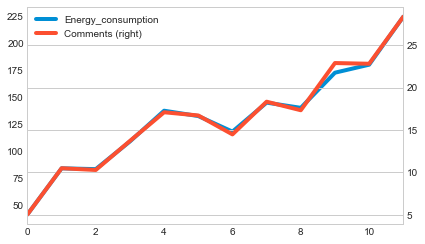

In [80]:
x['Energy (kWh)'].plot(label="Energy_consumption", legend=True)
x['Gasoline Savings (gallons)'].plot(secondary_y=True, label="", legend=True)

In [141]:
x.columns

Index(['Month', 'Energy (kWh)', 'Gasoline Savings (gallons)'], dtype='object')

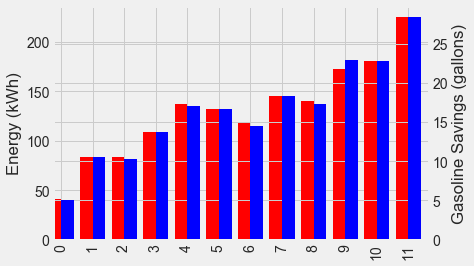

In [143]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

x['Energy (kWh)'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
x['Gasoline Savings (gallons)'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('Energy (kWh)')
ax2.set_ylabel('Gasoline Savings (gallons)')

plt.show()

In [57]:
df.A.plot(label="Points", legend=True)
df.B.plot(secondary_y=True, label="Comments", legend=True)

457

AttributeError: Unknown property secondary_y

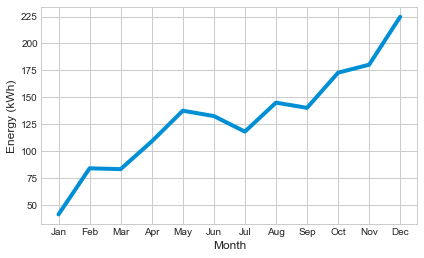

In [83]:
sns.lineplot(x=x['Month'],y=x['Energy (kWh)'])
sns.lineplot(x=x['Month'],y=x['Gasoline Savings (gallons)'],secondary_y=True, label="Comments", legend=True)

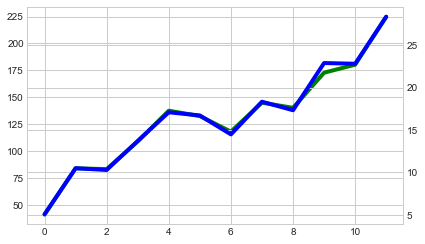

In [85]:
import matplotlib.pyplot as plt
sns.lineplot(data=x['Energy (kWh)'], color="g")
ax2 = plt.twinx()
sns.lineplot(data=x['Gasoline Savings (gallons)'], color="b", ax=ax2)

In [118]:
x

,Month,Energy (kWh),Gasoline Savings (gallons)
0,Jan,41.032258,5.048710
1,Feb,83.892857,10.495357
2,Mar,83.129032,10.290323
3,Apr,108.866667,13.715000
4,May,137.419355,17.096129
5,Jun,132.466667,16.717000
6,Jul,118.000000,14.486452
7,Aug,144.935484,18.340645
8,Sep,140.100000,17.334333
9,Oct,172.774194,22.900645


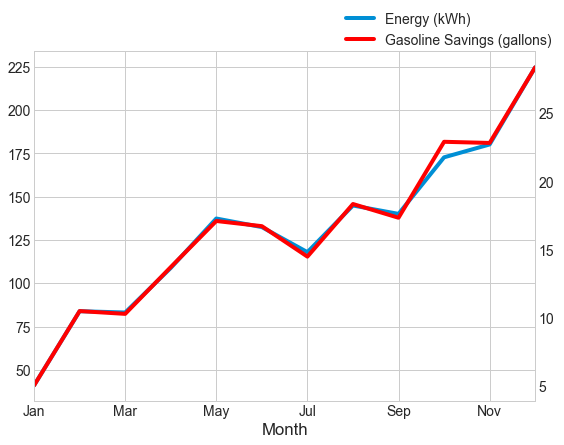

In [105]:
#plt.figure(figsize=(20,10))
#plt.style.use("fivethirtyeight")
plt.style.use("seaborn-whitegrid")
ax = x.plot(x='Month', y='Energy (kWh)', legend=False)
ax2 = ax.twinx()
x.plot(x="Month", y='Gasoline Savings (gallons)', ax=ax2, legend=False, color="r",figsize = (8,6))
ax.figure.legend()
plt.grid(b=None)
plt.show()

In [144]:
y=consumption_data[consumption_data['Year']=='2018'].groupby(['Month'])['GHG savings (kg)','Gasoline Savings (gallons)'].mean().reset_index()

In [119]:
y

,Month,GHG savings (kg),Gasoline Savings (gallons)
0,Jan,17.322581,5.048710
1,Feb,35.250000,10.495357
2,Mar,34.967742,10.290323
3,Apr,45.800000,13.715000
4,May,57.677419,17.096129
5,Jun,55.733333,16.717000
6,Jul,49.516129,14.486452
7,Aug,60.935484,18.340645
8,Sep,58.833333,17.334333
9,Oct,72.580645,22.900645


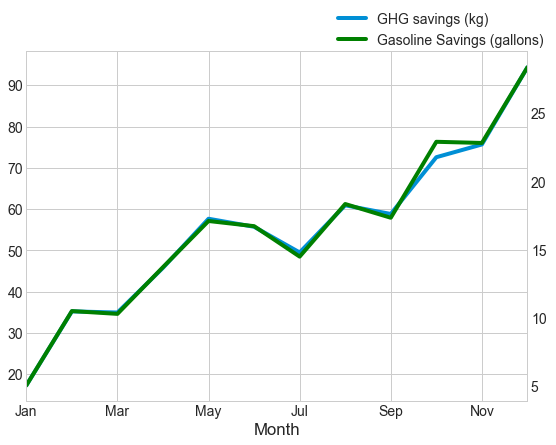

In [117]:
plt.style.use("seaborn-whitegrid")
ax = y.plot(x='Month', y='GHG savings (kg)', legend=False)
ax2 = ax.twinx()
x.plot(x="Month", y='Gasoline Savings (gallons)', ax=ax2, legend=False, color="g",figsize = (8,6))
ax.figure.legend()
plt.grid(b=None)
plt.show()

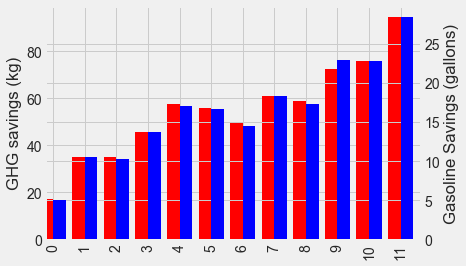

In [145]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

y['GHG savings (kg)'].plot(kind='bar', color='red', ax=ax, width=width, position=1)
y['Gasoline Savings (gallons)'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('GHG savings (kg)')
ax2.set_ylabel('Gasoline Savings (gallons)')

plt.show()